We chose to use crime, fires, and traffic in the 91 neighborhoods of Pittsburgh.

We considered things from what we chose, condemned properties, landslides, property tax delinquency, Police incident blotter, trees, SNAP, square footage, and more that were ruled out faster.

In [33]:
import matplotlib.pyplot as plt
%store -r frequencies
%store -r fire_dict
%store -r traf_dict

In order to find the best neighborhood, we used weights our datasets with the following:

Crime - 60%

Fires - 25%

Traffic - 15%

Since there was some math done behind the scenes, we must divide by 5.7 for the values of Fire because the average fire incident was multiplied by 5.7. 
Also, since the traffic was per day and the other data was about a decade, we divide it by 3650.

In [34]:
for key in fire_dict.keys():
    fire_dict[key] /= 5.7
for key in traf_dict.keys():
    traf_dict[key] /= 3650


As of right now, we do not have the traffic notebook, but we will calculate our scores minus the 15% allotted for traffic.

In [35]:
total_dict = dict()
for key in (frequencies.keys() and fire_dict.keys()):
    total_dict[key] = 0.6 * frequencies[key] + 0.25 * fire_dict[key] + 0.15 * traf_dict[key]

We sorted the dictionary!

In [36]:
sorted_totals = dict(sorted(total_dict.items(), key=lambda item: item[1]))

We made two new dictionaries, one for the best neighborhoods and one for the worst!

In [37]:
worst_neighborhoods = dict()
best_neighborhoods = dict()

names = list(sorted_totals.keys())
values = list(sorted_totals.values())

for key in sorted_totals.keys():
    if sorted_totals[key] > sorted_totals[names[73]]:
        worst_neighborhoods[key] = sorted_totals[key]
    if sorted_totals[key] < sorted_totals[names[20]]:
        best_neighborhoods[key] = sorted_totals[key]
print(worst_neighborhoods)
print(best_neighborhoods)

{'Beechview': 720.2077286627793, 'Allegheny Center': 745.9110597858761, 'Sheraden': 770.7923042786146, 'Knoxville': 801.3585940367651, 'Lincoln-Lemington-Belmar': 816.6515575674501, 'Brookline': 834.4537802838062, 'Hazelwood': 837.1618703696549, 'Mount Washington': 861.7946343168608, 'Bluff': 900.8510598790123, 'Marshall-Shadeland': 909.6697182299163, 'East Liberty': 1134.9532413201073, 'Homewood North': 1180.5317845473267, 'Homewood South': 1255.2005630106828, 'East Allegheny': 1329.7082777868343, 'Carrick': 1410.633899219997, 'South Side Flats': 2097.0643080005725, 'Central Business District': 2662.956967168134}
{'Mount Oliver Borough': 10.800429103013624, 'Central Northside': 13.474022956094531, 'Ridgemont': 22.201093894904, 'Regent Square': 22.289487526356073, 'New Homestead': 22.831981856753217, 'Swisshelm Park': 25.802423478684766, 'Chartiers City': 27.10964628558886, 'East Carnegie': 28.801052345410856, 'St. Clair': 32.502851855588915, 'Summer Hill': 45.04299419457514, 'Oakwood'

We then graphed both the dictionaries

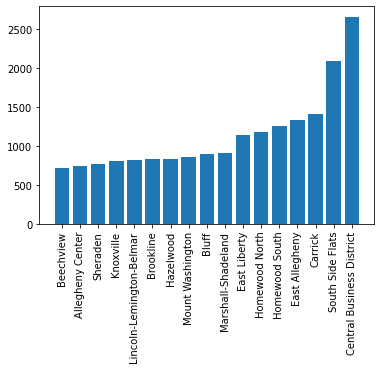

In [38]:
plt.bar(range(len(worst_neighborhoods)), list(worst_neighborhoods.values()), tick_label=list(worst_neighborhoods.keys()))
plt.xticks(rotation='vertical')
plt.show()

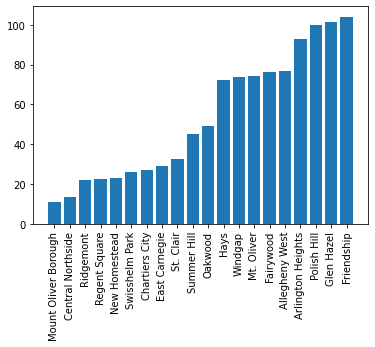

In [39]:
plt.bar(range(len(best_neighborhoods)), list(best_neighborhoods.values()), tick_label=list(best_neighborhoods.keys()))
plt.xticks(rotation='vertical')
plt.show()

As we can see, Mount Oliver Borough appears to be the safest neighborhood to live in with minimal distrubances. Henceforth, it is the best neighborhood to live in!

As a side note: it is very clear that the Central Business District is a HORRIBLE place to live!

Logan Conclusion:
* I can see my metric in the combined as all of my top 4 are in the top 8 of the combined metric. 
* The top pick by my metric won.
* My metric also has things that it overlooks, which can be seen with Central Northside coming second when it did not even make my graph.